In [275]:
import numpy as np
from scipy import stats
from scipy.special import comb
import matplotlib.pyplot as plt
import math

In [276]:
p = 1/7
N = [n * 3 for n in range(1, 11)]
# N

In [277]:
b1 = [3 * p for n in N]
# b1

In [278]:
b2 = [(n * p * (1-p)) / ((n/3 - n*p) ** 2) for n in N]
# b2

In [279]:
def getP(p, n):
    y = stats.binom.pmf(range(n+1), n ,p)
#     print("y:", y)
    n_3 = n / 3
    if int(n_3) - n_3 != 0:
        n_3 = int(n_3) + 1
#     print("n / 3:", n_3)
    n_3 = int(n_3)
    
    P = y[n_3:].sum()
    print("P:", P)
    return P

In [280]:
P = [getP(p, n) for n in N]

P: 0.3702623906705538
P: 0.20686108679206788
P: 0.12592854462799308
P: 0.07969486081614598
P: 0.051581690392872935
P: 0.033882448285835955
P: 0.022491184612753345
P: 0.01504756948201711
P: 0.010129354164162281
P: 0.006852230380517695


P: 0.3702623906705538
P: 0.20686108679206788
P: 0.12592854462799308
P: 0.07969486081614598
P: 0.051581690392872935
P: 0.033882448285835955
P: 0.022491184612753345
P: 0.01504756948201711
P: 0.010129354164162281
P: 0.006852230380517695


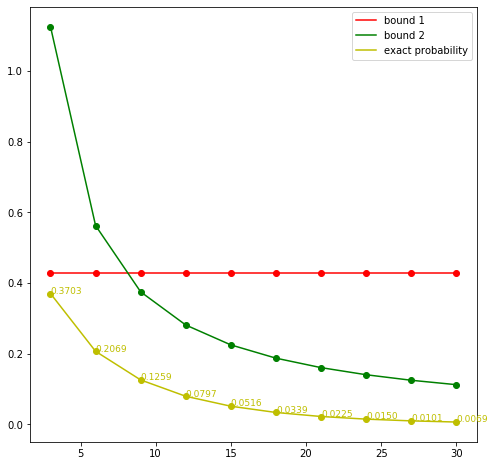

In [281]:
plt.figure(figsize=(8, 8))
plt.plot(N, b1,  color="r", label="bound 1")
plt.plot(N, b2, color="g", label="bound 2")
plt.plot(N, [getP(p, n) for n in N], color="y", label="exact probability")

plt.legend()

plt.plot(N, b1, 'o', color="r")
plt.plot(N, b2, 'o', color="g")
plt.plot(N, P, 'o', color="y")
# for i in range(len(N)):
#     n = N[i]
#     b1_ = b1[i]
#     plt.text(n, b1_, "%.4f"%b1_, fontsize=9, color="r")
# for i in range(len(N)):
#     n = N[i]
#     b2_ = b2[i]
#     plt.text(n, b2_, "%.4f"%b2_, fontsize=9, color="g")
for i in range(len(N)):
    n = N[i]
    P_ = P[i]
    plt.text(n, P_, "%.4f"%P_, fontsize=9, color="y")

# Q3 e

In [282]:
ph = 0.8
# pt = 0.2

In [283]:
# def comb(n, m):
#     return math.factorial(n)//(math.factorial(m)*math.factorial(n-m))

In [284]:
def getSmallestSubsetP(N, sigma):
#     print()
    P = []
    threshold = 1 - sigma

    for time_h in range(N+1):
        time_t = N - time_h
        p = comb(N, time_h) * (ph ** time_h) * (pt ** time_t) 
        P.append(p)
        sum_p = sum(P)
        if sum_p >= threshold or math.isclose(sum_p, threshold, rel_tol=1e-4):
#             print(N, sigma, sum(P), time_h)
            return time_h
    print(N, sigma, sum(P), time_h)
    return None, None

In [285]:
def getEssentialBitContent(time_h, N):
    H = np.log2(time_h)
    return H / N

In [312]:
sigma = [i * 0.01 for i in range(0, 101)]
# sigma

In [313]:
N = [10, 50, 100, 250, 500, 1010]
N

[10, 50, 100, 250, 500, 1010]

In [314]:
# t = 1001
# for n in range(t):
#     print(comb(t, n))

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  


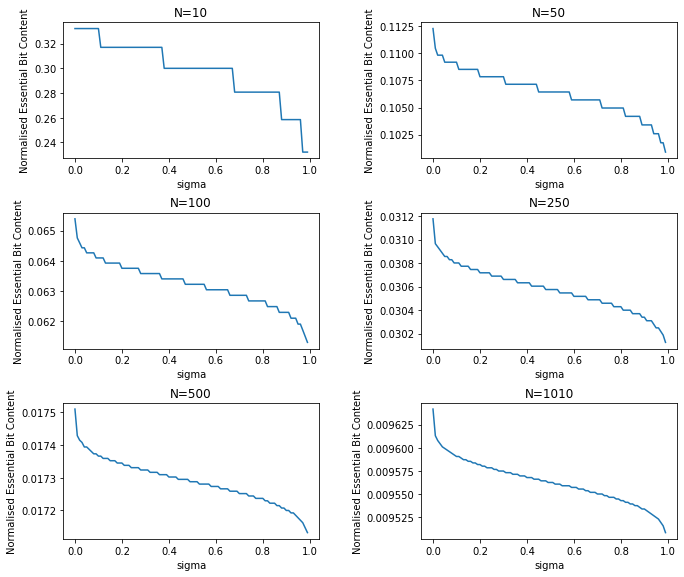

In [315]:
plt.figure(figsize=(11, 13))
counter = 0
for n in N:
    counter += 1
    H = []
    for s in sigma:
        time_h = getSmallestSubsetP(n, s)
        H.append(getEssentialBitContent(time_h, n))
    ax = plt.subplot(4, 2, counter)
    ax.set_title(f"N={n}")
    plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
    plt.xlabel('sigma')
    plt.ylabel('Normalised Essential Bit Content')
    plt.plot(sigma, H)
plt.show()
        

In [316]:
lg = np.log2
lg

<ufunc 'log2'>

In [317]:
7/48*lg(48/7) + 1/4 * lg(4) + 5/16 + lg(16/5) + 7 / 24 * lg(24/7)

3.4141085541112752

In [318]:
1/256

0.00390625

In [319]:
2 ** 1.5


2.8284271247461903